# Global Imports

In [39]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
import seaborn as sns
import time

# Data Wrangling

In [2]:
# import data into Python
Weather = pd.read_csv('/Users/jlmac01/Documents/WorkInProgress/weatherHistory.csv')

## Exploring Data

In [3]:
# view a few rows of data
Weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
# statistical summary of numeric data
Weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### Renaming Columns With Parenthesis

In [5]:
# inspect column names that have () since my computer won't format correctly with the ()
Weather.iloc[:, [3, 4, 6, 7, 8, 10]].head(0)

,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)


In [6]:
# fix column names
Weather = Weather.rename(columns={Weather.columns[3]: "Temperature", Weather.columns[4]: "Apparent_Temperature",
                                 Weather.columns[6]: "Wind_Speed", Weather.columns[7]: "Wind_Bearing",
                                 Weather.columns[8]: "Visibility", Weather.columns[10]: "Pressure"})

In [7]:
# verify new column names are correct
Weather.iloc[:, [3, 4, 6, 7, 8, 10]].head(0)

,Temperature,Apparent_Temperature,Wind_Speed,Wind_Bearing,Visibility,Pressure


## Data Cleaning

### Remove Missing Values

In [8]:
# see if there are missing values
Weather.isnull().sum()

Formatted Date            0
Summary                   0
Precip Type             517
Temperature               0
Apparent_Temperature      0
Humidity                  0
Wind_Speed                0
Wind_Bearing              0
Visibility                0
Loud Cover                0
Pressure                  0
Daily Summary             0
dtype: int64

In [9]:
# remove missing values
Weather.dropna(inplace=True)

### Remove Incorrect Data

In [10]:
# incorrectly inputted data for pressure--cannot have an air pressure rating of 0
Weather.groupby('Pressure').size()

Pressure
0.00       1288
973.78        1
974.52        1
974.78        1
975.12        1
975.31        1
975.89        1
976.38        1
976.61        1
976.62        1
976.76        1
977.24        1
977.27        1
977.39        1
979.37        1
979.88        1
980.67        1
981.31        1
982.53        1
983.08        1
983.66        1
984.32        1
984.38        1
984.90        1
985.10        1
985.40        1
985.57        1
985.62        1
985.85        1
986.00        1
           ... 
1043.79       1
1043.86       1
1043.91       1
1043.99       1
1044.11       1
1044.23       1
1044.31       1
1044.35       1
1044.40       1
1044.60       1
1044.62       1
1044.65       1
1044.71       1
1044.82       2
1044.83       1
1045.07       1
1045.14       1
1045.25       1
1045.30       1
1045.32       1
1045.38       1
1045.40       1
1045.59       1
1045.68       1
1045.78       1
1045.90       1
1045.93       1
1046.06       1
1046.26       1
1046.38       1
Length: 4971, d

In [11]:
# convert Pressure data points of 0 to NaN
Weather.Pressure.replace(0, np.NaN, inplace=True)

In [12]:
# confirm 0 data points were converted to NaN
Weather.isnull().sum()

Formatted Date             0
Summary                    0
Precip Type                0
Temperature                0
Apparent_Temperature       0
Humidity                   0
Wind_Speed                 0
Wind_Bearing               0
Visibility                 0
Loud Cover                 0
Pressure                1288
Daily Summary              0
dtype: int64

In [13]:
# remove NaNs
Weather.dropna(inplace=True)

In [14]:
# confirm NaNs were dropped
Weather.isnull().sum()

Formatted Date          0
Summary                 0
Precip Type             0
Temperature             0
Apparent_Temperature    0
Humidity                0
Wind_Speed              0
Wind_Bearing            0
Visibility              0
Loud Cover              0
Pressure                0
Daily Summary           0
dtype: int64

### Remove Duplicates

In [15]:
# remove duplicates
Weather.drop_duplicates(inplace=True)

### Convert Time Data

In [16]:
Weather['Formatted Date'].dtype

dtype('O')

In [17]:
# convert to time data type
Weather['Formatted Date'] = pd.to_datetime(Weather['Formatted Date'])

In [18]:
Weather['Formatted Date'].dtype

dtype('<M8[ns]')

In [19]:
# see the format of the data
Weather['Formatted Date'].head()

0   2006-03-31 22:00:00
1   2006-03-31 23:00:00
2   2006-04-01 00:00:00
3   2006-04-01 01:00:00
4   2006-04-01 02:00:00
Name: Formatted Date, dtype: datetime64[ns]

# Data Visualization

## View of Data in One Dimension

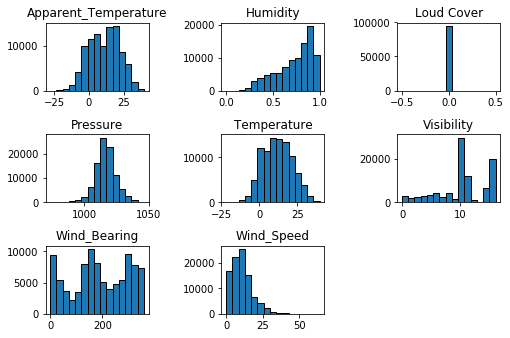

In [20]:
# histogram for numerical data
Weather.hist(bins=15, edgecolor = 'black', grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

Apparent temperature, temperature, and pressure are roughly symmetric. Humidity and visibility are skewed left. Wind bearing is bimodal. We will ignore loud cover since that data was inputted incorrectly. 

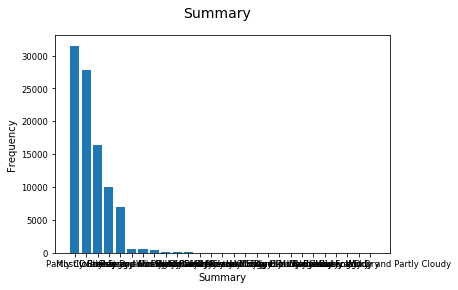

In [21]:
# bar graph for summary
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Summary", fontsize=14)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Summary")
ax.set_ylabel("Frequency") 
w_s = Weather['Summary'].value_counts()
w_s = (list(w_s.index), list(w_s.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_s[0], w_s[1])

In [36]:
# number of elements in each category of Summary
Weather.groupby('Summary').size()

Summary
Breezy                                    30
Breezy and Dry                             1
Breezy and Foggy                          35
Breezy and Mostly Cloudy                 511
Breezy and Overcast                      525
Breezy and Partly Cloudy                 379
Clear                                  10018
Dangerously Windy and Partly Cloudy        1
Drizzle                                   39
Dry                                       34
Dry and Mostly Cloudy                     14
Dry and Partly Cloudy                     86
Foggy                                   7019
Humid and Mostly Cloudy                   40
Humid and Overcast                         7
Humid and Partly Cloudy                   17
Light Rain                                63
Mostly Cloudy                          27780
Overcast                               16361
Partly Cloudy                          31506
Rain                                      10
Windy                                      1
Wi

From the bar graph, we see most days are partly cloudy, mostly cloudy, overcast, or clear. 

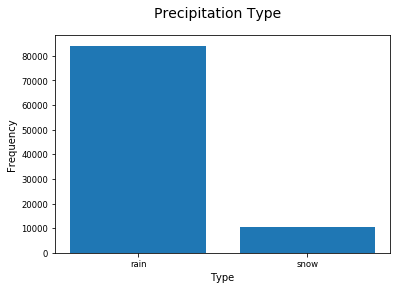

In [23]:
# bar graph for precip type
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Precipitation Type", fontsize=14)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Type")
ax.set_ylabel("Frequency") 
w_s = Weather['Precip Type'].value_counts()
w_s = (list(w_s.index), list(w_s.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_s[0], w_s[1])

From the barchart, we see rain is the most common form of precipitation

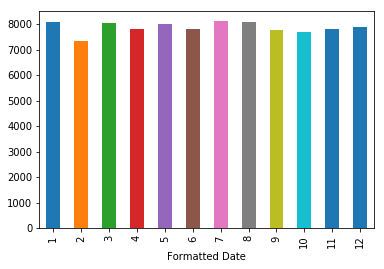

In [24]:
# bar graph for formatted date
TimeGraph = Weather['Formatted Date'].astype("datetime64")
TimeGraph.dtype
TimeGraph.groupby(TimeGraph.dt.month).count().plot(kind="bar")

From the bar chart, we see data about weather was collected pretty evenly from all months of the year. 

## View of Numerical Data in Multiple Dimensions

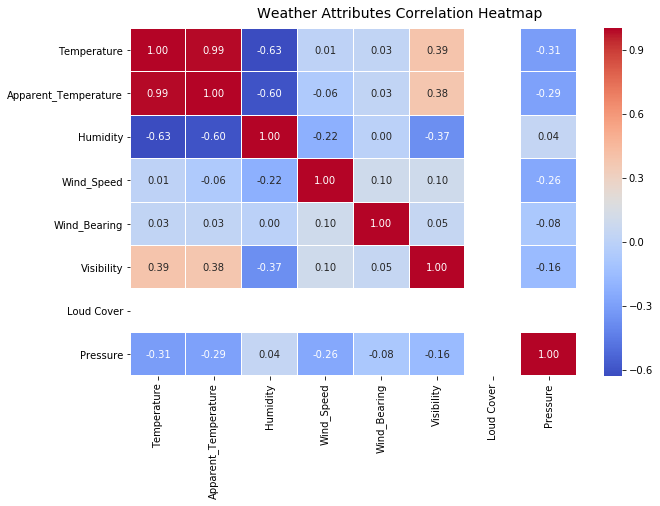

In [25]:
# correlation matrix
f, ax = plt.subplots(figsize=(10, 6))
corr = Weather.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Weather Attributes Correlation Heatmap', fontsize=14)

Temperature and Apparent Temperature have a strong, positive correlation. Temperature has a moderate, negative correlation with Humidity. Temperature and Visibility have a moderate, positive correlation. 
Apparent Temperature and Temperature have a strong, positive correlation. Apparent Temperature has a moderate, negative correlation with Humidity. Apparent Temperature and Visibility have a moderate, positive correlation. 
Visibility and Humidity have a moderate, negative correlation.
All other variable have weak correlations with each other. 

/Users/jlmac01/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


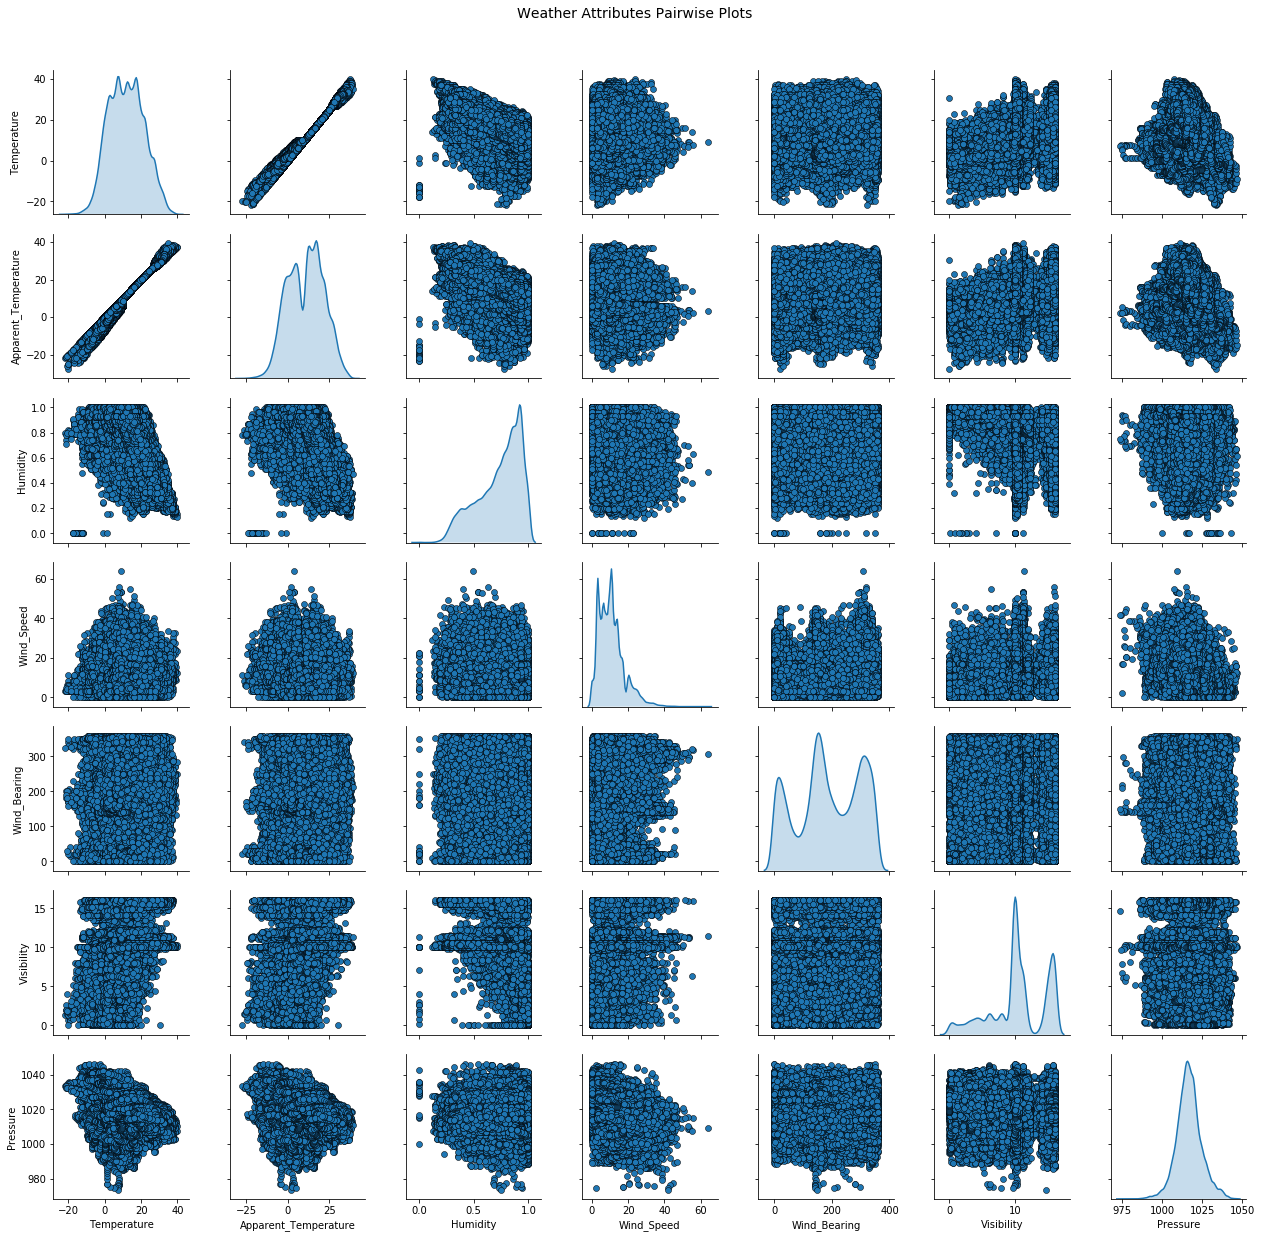

In [30]:
# Pair-wise Scatter Plots
cols = ['Temperature', 'Apparent_Temperature', 'Humidity', 'Wind_Speed', 'Wind_Bearing', 'Visibility', 'Pressure']
pp = sns.pairplot(Weather[cols],
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Weather Attributes Pairwise Plots', fontsize=14)

The scatterplots depict the correlations described in the correlation matrix. 

## Relationship Between Temperature and Humidity
From the scatterplots and correlation matrix, there appears to be a relationship between these three variables. I want to examine this further. 

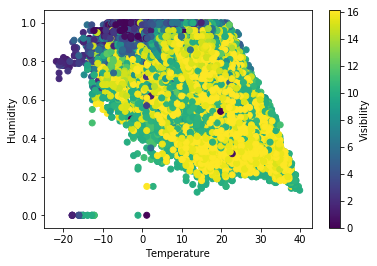

In [27]:
# scatterplot of temperature vs humidity with visbility as color
plt.scatter(Weather['Temperature'], Weather['Humidity'], c = Weather['Visibility'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
cbar = plt.colorbar()
cbar.set_label("Visibility", labelpad=+1)
plt.show()

Low visibility tends to happen when the temperature is low and the humidity is high. High visibility tends to happen when the humidity is low and temperature is high.

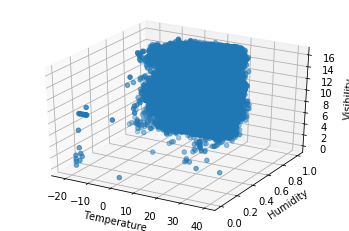

In [28]:
# 3d graph of temperature, humidity, and visibility
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Weather['Temperature'], Weather['Humidity'], Weather['Visibility'])
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Visibility')
plt.show()

The three dimensional graph does not describe much about the relationship between these three variables.

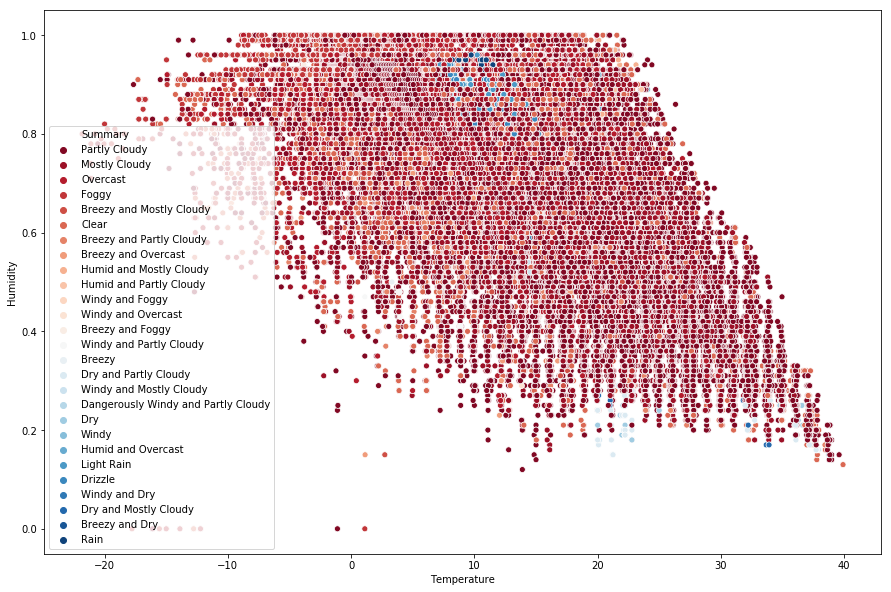

In [53]:
# scatterplot of Humidity vs Temperature with color based on Summary
sns.scatterplot(x=Weather['Temperature'], y=Weather['Humidity'], hue=Weather['Summary'], 
                palette = sns.color_palette("RdBu", n_colors=27))
rcParams['figure.figsize'] = 15,10

Most days are partly cloudy, mostly cloudy, overcast, or foggy. These observations overwhelm the scatterplot, so it is difficult to distinguish between them.

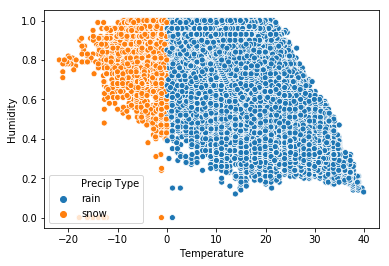

In [35]:
# scatterplot of Humidity vs Temperature with color based on Precipitation
sns.scatterplot(x=Weather['Temperature'], y=Weather['Humidity'], hue=Weather['Precip Type'])

When the temperature is below 0 degrees, it snows. 